In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
fashion=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

# Reshape x_train and x_test to include a channel dimension for the CNN model
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28, 1)

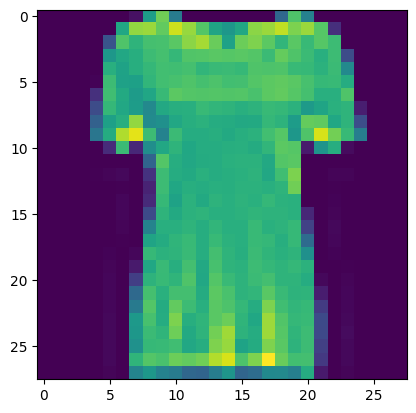

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10])

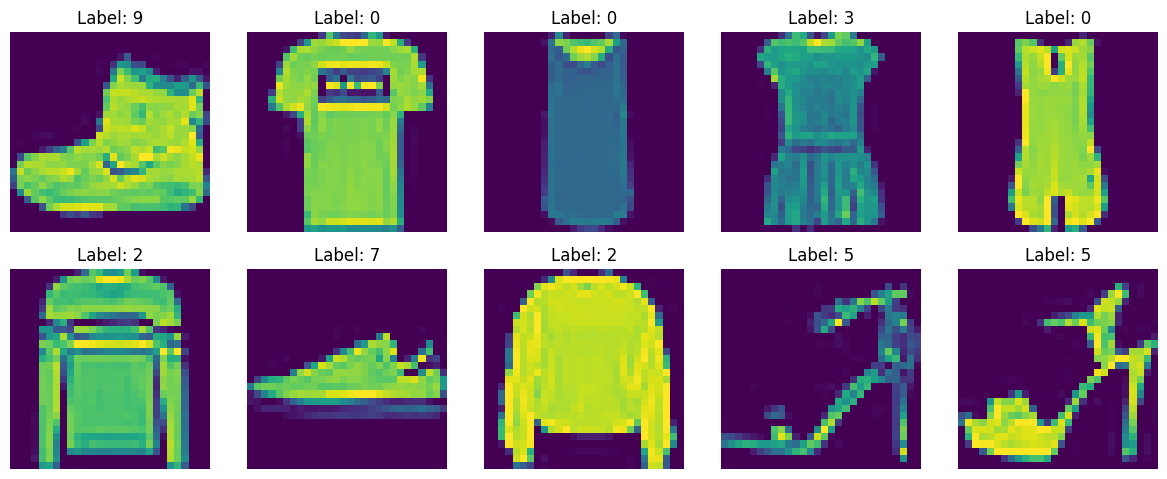

In [6]:
import matplotlib.pyplot as plt


num_images = 10

plt.figure(figsize=(12, 12))

for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

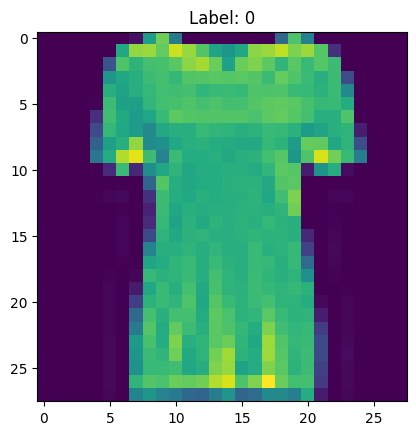

In [7]:
plt.imshow(x_train[10])
plt.title(f'Label: {y_train[10]}')
plt.show()

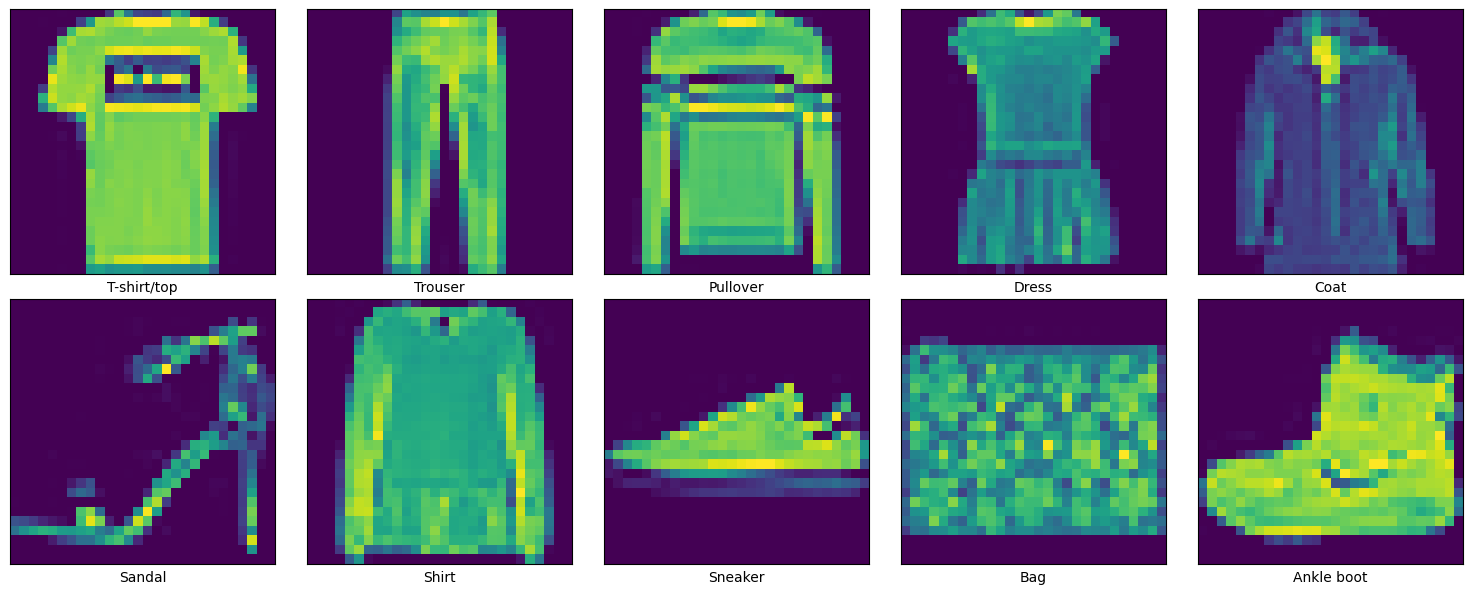

In [8]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

unique_label_indices = {}

for i, label in enumerate(y_train):
    if label not in unique_label_indices:
        unique_label_indices[label] = i
    if len(unique_label_indices) == 10:
        break

sorted_labels = sorted(unique_label_indices.keys())

plt.figure(figsize=(15, 6))

for idx, label in enumerate(sorted_labels):
    image_index = unique_label_indices[label]
    plt.subplot(2, 5, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[image_index])
    plt.xlabel(class_names[label]) # Use xlabel for the class name

plt.tight_layout()
plt.show()

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model=keras.models.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu')
])

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.7338 - loss: 0.7256 - val_accuracy: 0.8655 - val_loss: 0.3778
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.8746 - loss: 0.3461 - val_accuracy: 0.8868 - val_loss: 0.3125
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8963 - loss: 0.2855 - val_accuracy: 0.8781 - val_loss: 0.3187
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9062 - loss: 0.2544 - val_accuracy: 0.9017 - val_loss: 0.2694
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9181 - loss: 0.2232 - val_accuracy: 0.9039 - val_loss: 0.2594
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9235 - loss: 0.2068 - val_accuracy: 0.9057 - val_loss: 0.2808
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9323 - loss: 0.1821 - val_accuracy: 0.9079 - val_loss: 0.2591
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9371 -

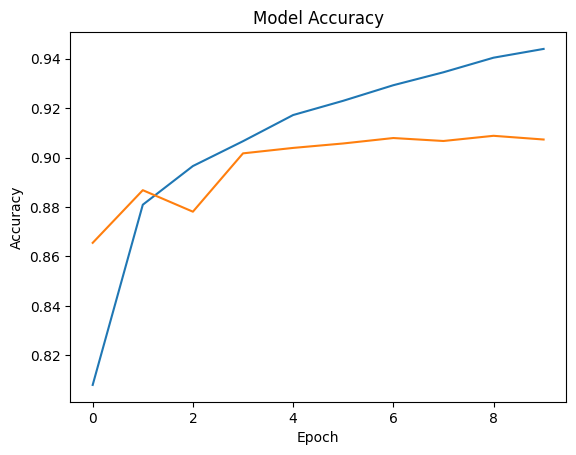

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

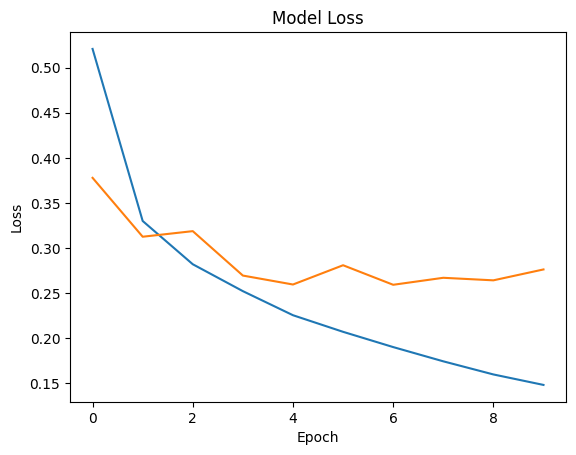

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [16]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [17]:
import numpy as np

y_pred1=np.argmax(y_pred,axis=1)

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

313/313 - 2s - 7ms/step - accuracy: 0.9073 - loss: 0.2762
Test accuracy: 90.73%


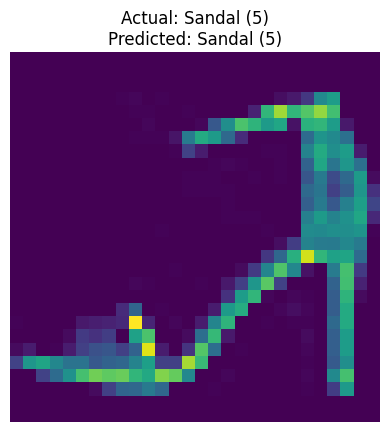

In [19]:
import matplotlib.pyplot as plt

image_idx = 114

predicted_label = y_pred1[image_idx]
predicted_class_name = class_names[predicted_label]

actual_label = y_test[image_idx]
actual_class_name = class_names[actual_label]

plt.imshow(x_test[image_idx])
plt.title(f'Actual: {actual_class_name} ({actual_label})\nPredicted: {predicted_class_name} ({predicted_label})')
plt.axis('off')
plt.show()